<a href="https://colab.research.google.com/github/daje0601/pandas_study/blob/main/section1_project_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 주제 : 다음 분기에 어떤 게임을 설계해야 할까요?  
2. 대상 : 강다솔님의 발표를 듣는 사람은 비데이터 직군이라 가정합니다.  
3. 목표 : 해당 주제에 대한 분석 설명 영상(5분) 제작  
4. 필수분석 내용   
  1) 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.  
  2) 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.  
  3) 매출이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

pd.set_option("max_rows", 10000)

In [2]:
url ="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv"

df = pd.read_csv(url, index_col=0)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [3]:
df.shape

(16598, 9)

In [4]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [5]:
df.describe(include=["O"])

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16598,16598,16548,16540,16598,16598,16598,16598
unique,11493,31,12,578,494,363,282,190
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts,0,0,0,0
freq,12,2163,3305,1351,4443,5665,10333,6386


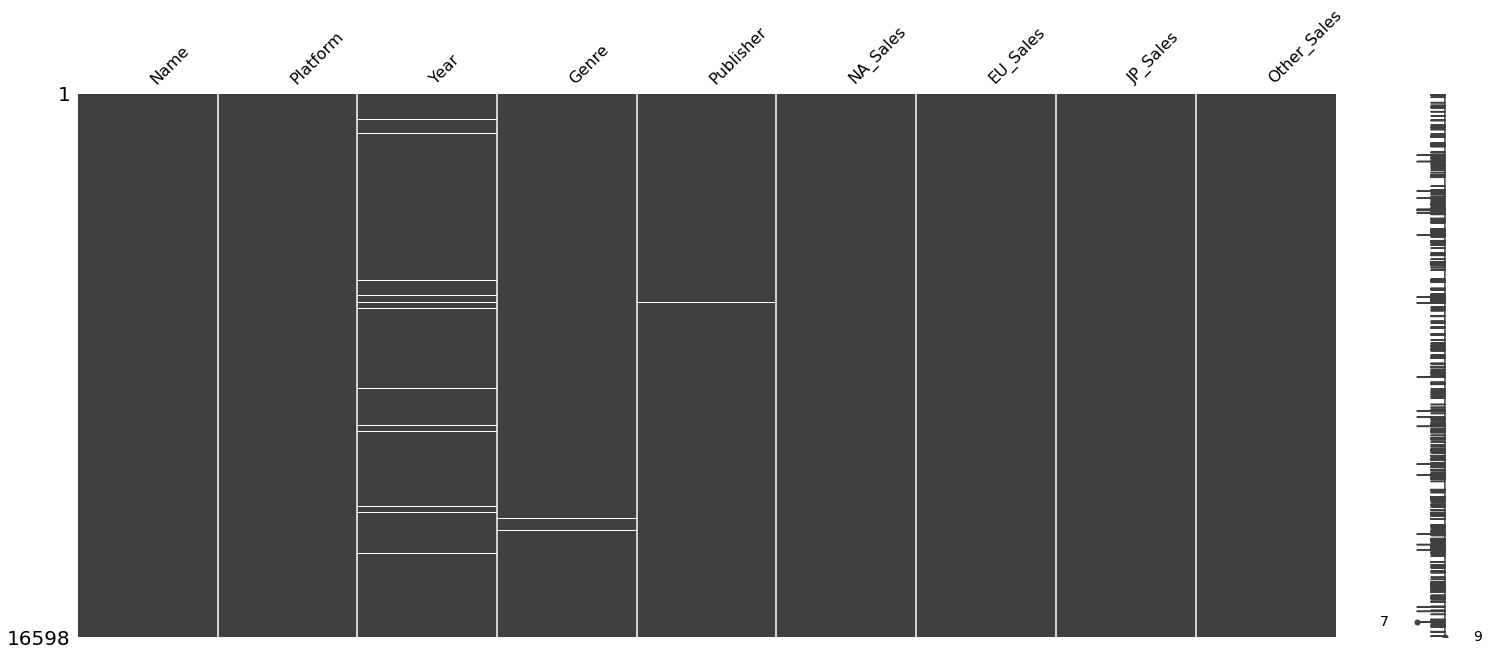

In [6]:
import missingno as msno

msno.matrix(df)

In [7]:
df["Genre"] = df["Genre"].fillna(df.groupby(["Platform","Publisher"])["Genre"].transform("count"))
# groupy와 fillna를 함께 사용할 수 있는데 잠깐 설명을 해놓자 나중에 내가 모르니까
# 일단 Genre라는 columns의 NaN값을 처리하려고 해 
# 그런데 "Platform","Publisher"를 그룹을 지어서 장르를 추측하고자 하는거야 
# 위 두 그룹의 count를 기준으로 비어있는 결측치 채우는 것이지 

In [8]:
df["Publisher"] = df["Publisher"].fillna(df.groupby(["Platform","Genre"])["Publisher"].transform("count"))

In [9]:
df["Year"] = df["Year"].fillna(df.groupby(["Platform","Genre","Publisher"])["Year"].transform("count"))

In [10]:
condition = (df["Year"] < 1900)
df[condition].shape

(371, 9)

In [11]:
df1 = df.iloc[:, 5:]
df1


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,0.04,0,0,0
2,0.17,0,0,0.01
3,0,0,0.02,0
4,0.04,0,0,0
5,0.12,0.09,0,0.04
...,...,...,...,...
16594,0.15,0.04,0,0.01
16595,0.01,0,0,0
16596,0.44,0.19,0.03,0.13
16597,0.05,0.05,0.25,0.03


In [12]:
lists = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
for list in lists :
  df1[list] = (df1[list].replace(r'[KM]+$', '', regex=True).astype(float) * df1[list].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))

df1.head(500)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,0.04,0.00,0.00,0.00
2,0.17,0.00,0.00,0.01
3,0.00,0.00,0.02,0.00
4,0.04,0.00,0.00,0.00
5,0.12,0.09,0.00,0.04
6,0.00,0.00,0.14,0.00
7,0.02,0.01,0.00,0.00
8,0.07,0.00,0.11,0.01
9,0.00,0.00,0.04,0.00
10,0.04,0.03,0.00,0.01


In [13]:
# df1["NA_Sales"] = (df1["NA_Sales"].replace(r'[KM]+$', '', regex=True).astype(float) * df1["NA_Sales"].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))
# df1["EU_Sales"] = (df1["EU_Sales"].replace(r'[KM]+$', '', regex=True).astype(float) * df1["EU_Sales"].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))
# df1["JP_Sales"] = (df1["JP_Sales"].replace(r'[KM]+$', '', regex=True).astype(float) * df1["JP_Sales"].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))
# df1["Other_Sales"] = (df1["Other_Sales"].replace(r'[KM]+$', '', regex=True).astype(float) * df1["Other_Sales"].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))
# df1

AttributeError: ignored